<h1 style="color:purple">Branch Performance And Profitability  Analysis</h1>

<h2 style="color:purple;">Objective</h2>

                                     

<p>The goal of this project is to analyze the performance and profitability of bank branches by identifying high-performing and underperforming branches. Using key financial metrics, data visualization, and machine learning models, the analysis will help in benchmarking branches, diagnosing reasons for poor performance, and providing insights to optimize profitability and operational efficiency</p>.

<h2 style="color:purple;">Key component</h2><p>
1)Data Preprocessing : Load branch financial data<br>
2)Predictive Modeling :Train a Random Forest model to predict branch profitability
Evaluate model accuracy using R² score, MAE, and MSE<br>
3)Insights & Recommendations :Identify reasons for poor performance<br></p>

<h2 style="color:purple;">Methodology</h1>

1. Data Collection & Preprocessing :
Load branch financial data from a CSV file.<br>
Handle missing values using median imputation.<br>
Create key financial metrics such as:<br>
Loan-to-Deposit Ratio = Total Loans / Total Deposits<br>
Cost-Income Ratio = Operating Expense / (Interest Income + Non-Interest Income)<br>
Profit Margin = Net Profit / (Interest Income + Non-Interest Income)<br>
2. Exploratory Data Analysis (EDA)<br>
Create visualizations such as:<br>
Correlation heatmaps to identify relationships between variables such as
Histograms to analyze the distribution of net profit..<br>
3. Branch Benchmarking & Clustering<br>
Apply K-Means Clustering to group branches based on performance metrics.<br>
Compare high-performing vs. underperforming branches to identify key differences.
4. Predictive Modeling for Profitability Analysis<br>
Train a Random Forest Regressor to predict branch profitability.<br>
Use financial variables such as Total Loans, Deposits, and Operating Expenses as features.
Evaluate model performance using:<br>
R² Score – Measures model accuracy.<br>
Mean Absolute Error (MAE) – Measures average error in predictions.<br>
Mean Squared Error (MSE) – Measures variance in predictions.<br>
5. Insights & Recommendations<br>
Identify underperforming branches based on profitability and cost-income ratio.<br>
Provide data-driven recommendations such as:<br>
Reducing operating expenses for loss-making branches.<br>
Increasing loan-to-deposit efficiency for lower-margin branches.<br>

In [1]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import folium # folium is a Python library used to create interactive maps. 
from scipy import stats
from scipy.stats import boxcox
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
import time
import requests
from IPython.display import display
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV, train_test_split #Grid Search :  A technique used to find the best hyperparameters for the model by evaluating different combinations.
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [5]:
pip install folium pandas requests


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Load the dataset
df=pd.read_csv(r"C:\Users\harpreyrna kour\Desktop\branch profit\branch_task.csv")
# Display first few rows
df.head()


,Branch_ID,Branch_Name,Total_Loans,Total_Deposits,Interest_Income,Non_Interest_Income,Operating_Expense,Net_Profit,Revenue,Location
0,39.0,Branch_33,43850.0,52950.0,2620.0,1995.0,4386.0,NaN,4642.0,Bangalore
1,29.0,NaN,6925.0,NaN,4857.0,1440.0,4515.0,1782.0,1933.0,Chandigarh
2,15.0,Branch_21,23440.0,33002.0,1863.0,480.0,NaN,1.0,NaN,Delhi
3,43.0,Branch_6,44685.0,51661.0,NaN,244.0,2464.0,NaN,2827.0,Jammu
4,8.0,Branch_6,31015.0,38603.0,2792.0,1450.0,4163.0,79.0,3380.0,Haryana


In [3]:
df.Revenue.max()

4711.0

In [4]:
df.nunique() #to check unique values

Branch_ID               50
Branch_Name             50
Total_Loans            938
Total_Deposits         940
Interest_Income        830
Non_Interest_Income    745
Operating_Expense      844
Net_Profit             882
Revenue                827
Location                38
dtype: int64

In [5]:
df.dtypes #to check data types of column

Branch_ID              float64
Branch_Name             object
Total_Loans            float64
Total_Deposits         float64
Interest_Income        float64
Non_Interest_Income    float64
Operating_Expense      float64
Net_Profit             float64
Revenue                float64
Location                object
dtype: object

In [6]:
df.isnull().sum()  #to check the null values 

Branch_ID               51
Branch_Name             50
Total_Loans             51
Total_Deposits          50
Interest_Income         51
Non_Interest_Income     51
Operating_Expense       51
Net_Profit              52
Revenue                 51
Location               321
dtype: int64

In [7]:
import pandas as pd

# Fill missing values in numerical columns with the median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols]).median())

# Fill missing values in categorical columns with the mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check if the missing values are filled
print(df.isnull().sum())


Branch_ID              0
Branch_Name            0
Total_Loans            0
Total_Deposits         0
Interest_Income        0
Non_Interest_Income    0
Operating_Expense      0
Net_Profit             0
Revenue                0
Location               0
dtype: int64


In [8]:
# 2. Encode categorical columns (One-Hot Encoding for categories with <= 10 unique values)
# Step 1 :The variable low_cardinality_cols now contains only the column names that are categorical and have 10 or fewer unique values.
low_cardinality_cols = [col for col in cat_cols if df[col].nunique() <= 10]
# STEP 2: Converts each categorical column in low_cardinality_cols into dummy/indicator variables (one-hot encoding).
#Creates one binary column per unique category (except one, since drop_first=True).
df = pd.get_dummies(df, columns=low_cardinality_cols, drop_first=True)

In [9]:
# 3. Remove constant columns (columns with only one unique value)
df = df.loc[:, df.nunique() > 1]


In [10]:
# 4. Apply PCA to numerical columns (after excluding certain columns like 'Revenue', 'Net_Profit')
# Ensure to exclude 'Revenue' or other important columns
revenue = df['Revenue'].copy()  # Save revenue column for visualization after PCA
profit = df['Net_Profit'].copy()  # Save Net Profit column for visualization
num_cols = df.select_dtypes(include=['int64', 'float64']).columns #Selects only numerical columns (integer and float).
num_cols = [col for col in num_cols if col not in ['Revenue', 'Net_Profit']]  # Exclude important columns

# Apply PCA to remaining numerical columns
df_pca = df[num_cols]
pca = PCA(n_components=2)#Initializes Principal Component Analysis (PCA) and sets it to extract 2 principal components.
df_pca = pca.fit_transform(df_pca)# transformation take place 
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2']) #PCA1: most of the  variance in data #PCA2:most important component 
df = pd.concat([df, df_pca], axis=1) # merge original data + PCA-transformed features.

In [11]:
print(df[['PCA1', 'PCA2']].head())  # Display the first few rows of PCA-transformed data


           PCA1          PCA2
0  24503.685955  -2221.188678
1 -14258.081296 -15947.771141
2  -4029.822899  -2857.608990
3  24168.102052   -713.112254
4   5273.458607  -1362.884011


In [12]:
# Step 4: Apply Box-Cox Transformation to numerical columns
from scipy.stats import boxcox

# Ensure numerical columns are positive, as Box-Cox only works with positive values
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Apply Box-Cox transformation to each numeric column
for col in num_cols:
    if df[col].min() > 0:  # Box-Cox only works on strictly positive values
        df[col], _ = boxcox(df[col])
    else:
        print(f"Skipping Box-Cox for {col} as it contains non-positive values.")



Skipping Box-Cox for Net_Profit as it contains non-positive values.
Skipping Box-Cox for PCA1 as it contains non-positive values.
Skipping Box-Cox for PCA2 as it contains non-positive values.


In [13]:
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)  # Replace NaN in categorical columns


In [14]:
print(df.columns)  # Check available column names


Index(['Branch_ID', 'Branch_Name', 'Total_Loans', 'Total_Deposits',
       'Interest_Income', 'Non_Interest_Income', 'Operating_Expense',
       'Net_Profit', 'Revenue', 'Location', 'PCA1', 'PCA2'],
      dtype='object')


In [15]:
df.duplicated().sum()  #to check the duplicates in given dataset

9

In [16]:
#  Step 4: Remove constant columns (i.e., columns with only one unique value)
df = df.loc[:, df.nunique() > 1]

In [17]:
df.drop_duplicates(inplace=True) #to clear the duplicates 

In [18]:
print( df.columns)

Index(['Branch_ID', 'Branch_Name', 'Total_Loans', 'Total_Deposits',
       'Interest_Income', 'Non_Interest_Income', 'Operating_Expense',
       'Net_Profit', 'Revenue', 'Location', 'PCA1', 'PCA2'],
      dtype='object')


<h2 style="color:purple;">Top 5 Revenue Branches </h2>

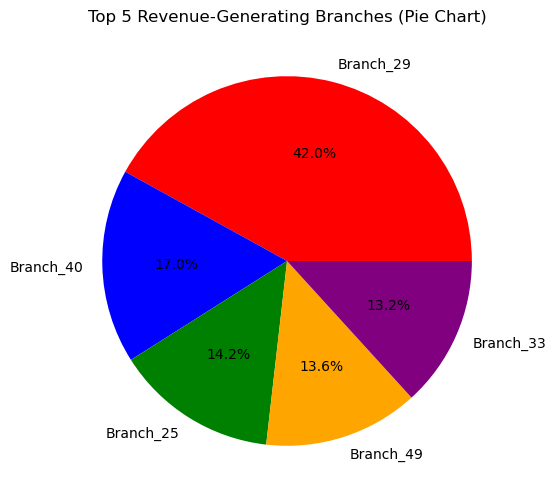

In [19]:
# Check if 'Revenue' column exists
if "Revenue" in df.columns:
    # Group by 'Branch_Name' and sum the 'Revenue'
    branch_revenue = df.groupby("Branch_Name", as_index=False)["Revenue"].sum()

    # Sort the branches by Revenue in descending order
    branch_revenue = branch_revenue.sort_values(by="Revenue", ascending=False)
# Select the top 5 revenue-generating branches
top_branches = branch_revenue.head(5)

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(top_branches["Revenue"], labels=top_branches["Branch_Name"], autopct="%1.1f%%", 
        colors=["red", "blue", "green", "orange", "purple"])
plt.title("Top 5 Revenue-Generating Branches (Pie Chart)")
plt.show()




<h2 style="color:purple;">Location of  Top 50 Branches </h2>

In [170]:
# 🔹 Replace with your OpenCage API key
API_KEY = "e425d7a8fb614c719e4502a834ace300"

# 🔹 Function to fetch latitude & longitude from OpenCage API
def get_lat_lon(location):
    url = f"https://api.opencagedata.com/geocode/v1/json?q={location},India&key={API_KEY}"
    response = requests.get(url)
    data = response.json()
    
    if data['results']:
        lat = data['results'][0]['geometry']['lat']
        lon = data['results'][0]['geometry']['lng']
        return lat, lon
    return None, None

# 🔹 Your dataset with branch locations
branch_locations = pd.DataFrame({"Location": [
    "Bangalore", "Chandigarh", "Delhi", "Jammu", "Haryana", "Ludhiana", "Mumbai", "Sikkim", "Punjab", "Kashmir",
    "Kerala", "Karnataka", "Andhra Pradesh", "Arunachal Pradesh", "Assam", "Bihar", "Chhattisgarh", "Goa",
    "Gujarat", "Himachal Pradesh", "Jharkhand", "Madhya Pradesh", "Maharashtra", "Manipur", "Meghalaya",
    "Mizoram", "Nagaland", "Odisha", "Rajasthan", "Tamil Nadu", "Telangana", "Tripura", "Uttar Pradesh",
    "Uttarakhand", "West Bengal"
]})

# 🔹 Fetch coordinates for each branch
branch_locations["Latitude"], branch_locations["Longitude"] = zip(*branch_locations["Location"].apply(get_lat_lon))

# 🔹 Create a Folium map centered on India
india_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# 🔹 Add Markers for Each Branch
for _, row in branch_locations.iterrows():
    if pd.notna(row["Latitude"]) and pd.notna(row["Longitude"]):  # Only plot valid locations
        folium.Marker(
            location=[row["Latitude"], row["Longitude"]],
            popup=row["Location"],  # Show branch location name
            icon=folium.Icon(color="blue", icon="cloud"),
        ).add_to(india_map)

# 🔹 Display the map in Jupyter Notebook
display(india_map)






In [20]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Assume 5% contamination
df['Outlier'] = iso_forest.fit_predict(df.select_dtypes(include=['number']))

# Display Outliers (-1 means outlier, 1 means normal)
outliers_iso = df[df['Outlier'] == -1]
print(outliers_iso)


     Branch_ID Branch_Name   Total_Loans  Total_Deposits  Interest_Income  \
1    17.096797   Branch_29   2912.534808    21883.370060      1950.846304   
17    0.925178   Branch_36   2525.519369     6036.311358      1772.351775   
29   26.615252   Branch_30   4811.216436    21883.370060       813.282486   
79    9.599416   Branch_24  16457.974957    34435.956639       465.818484   
97    0.000000   Branch_29   2382.633462     9016.326050      1700.688303   
102   0.000000   Branch_37   3911.213004     7514.122172       334.648339   
159  21.981656   Branch_22   2551.768786     5349.047016       721.289686   
162  23.861100    Branch_5   2288.836383     4590.477619      1187.445055   
198  24.325294   Branch_47   3846.995443    21883.370060       567.300307   
216   0.925178    Branch_4  16856.914778    34735.781805      1104.653824   
248   1.756500   Branch_26   3718.154206    10219.987690      1683.426665   
250  20.546300   Branch_35  10585.156481     9170.108452       292.311632   

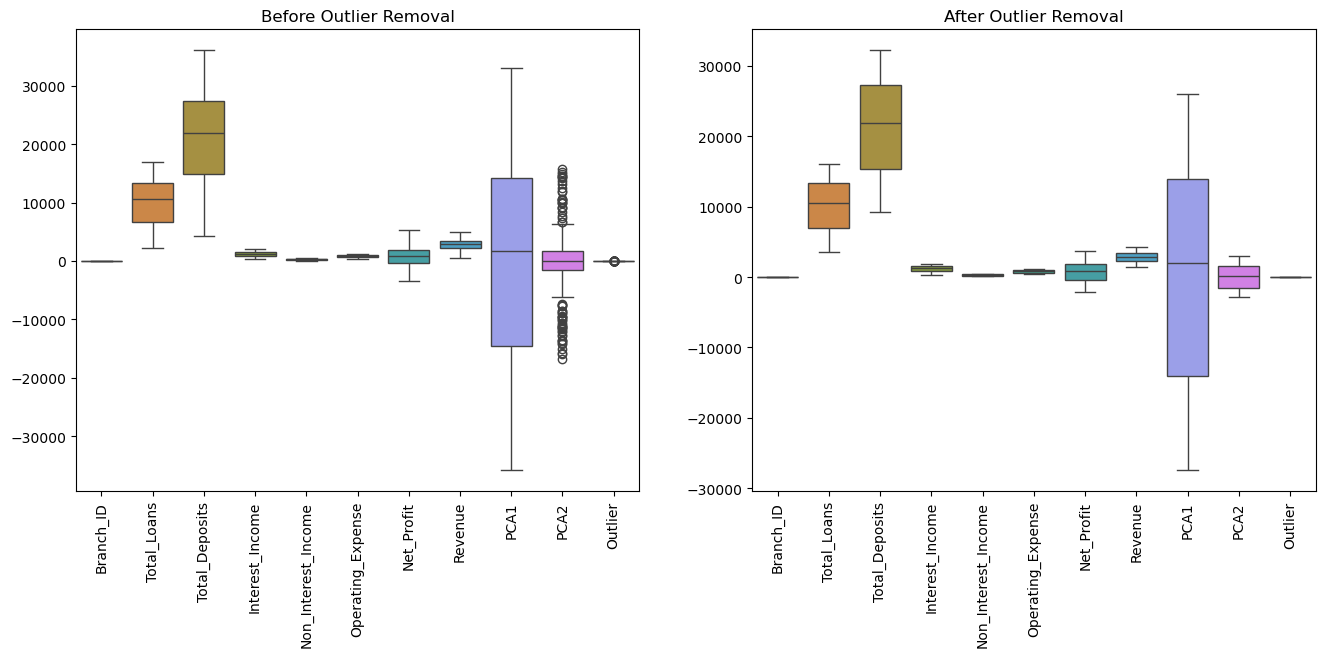

Rows before outlier removal: 1011
Rows after outlier removal : 944


In [21]:

# Function to remove outliers using stricter IQR threshold (3.0 instead of 1.5)
def remove_outliers_strict_iqr(df, factor=3.0):  
    df_cleaned = df.copy()
    numeric_cols = df_cleaned.select_dtypes(include=['number']).columns

    for col in numeric_cols:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - factor * IQR 
        upper_bound = Q3 + factor * IQR

        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    
    return df_cleaned

# Function to Winsorize (Cap extreme values instead of removing)
def winsorize_data(df, lower_percentile=0.05, upper_percentile=0.95):
    df_cleaned = df.copy() #made copy of dataset to avoid modification in original data
    numeric_cols = df_cleaned.select_dtypes(include=['number']).columns #select column with numerical data 

    for col in numeric_cols:
        lower = df_cleaned[col].quantile(lower_percentile) #get 5%
        upper = df_cleaned[col].quantile(upper_percentile)#get 95%
        df_cleaned[col] = np.clip(df_cleaned[col], lower, upper)  # Cap values
    
    return df_cleaned

# Apply both methods
df_cleaned = remove_outliers_strict_iqr(df)  # Step 1: Stricter IQR
df_cleaned = winsorize_data(df_cleaned)  # Step 2: Winsorize remaining outliers

# Plot boxplot before and after
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Original Data
sns.boxplot(data=df, ax=axes[0])
axes[0].set_title("Before Outlier Removal") #ax[0] represent the original data
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Cleaned Data
sns.boxplot(data=df_cleaned, ax=axes[1]) #ax[1]represent cleaned data
axes[1].set_title("After Outlier Removal")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

plt.show()

# Print number of remaining rows after outlier removal
print(f"Rows before outlier removal: {df.shape[0]}")
print(f"Rows after outlier removal : {df_cleaned.shape[0]}")


<h3 style="color:purple;">Creating New Metrics To better understand branch performance, we create new financial metrics:</h3>



In [22]:
# creating new financial metrics:
df['Loan_to_Deposit_Ratio'] = df['Total_Loans'] / df['Total_Deposits']
df['Cost_Income_Ratio'] = df['Operating_Expense'] / (df['Interest_Income'] + df['Non_Interest_Income'])
df['Net_Profit'] = (df['Interest_Income'] + df['Non_Interest_Income']) - df['Operating_Expense']
df['Profit_Margin'] = df['Net_Profit'] / (df['Interest_Income'] + df['Non_Interest_Income'])

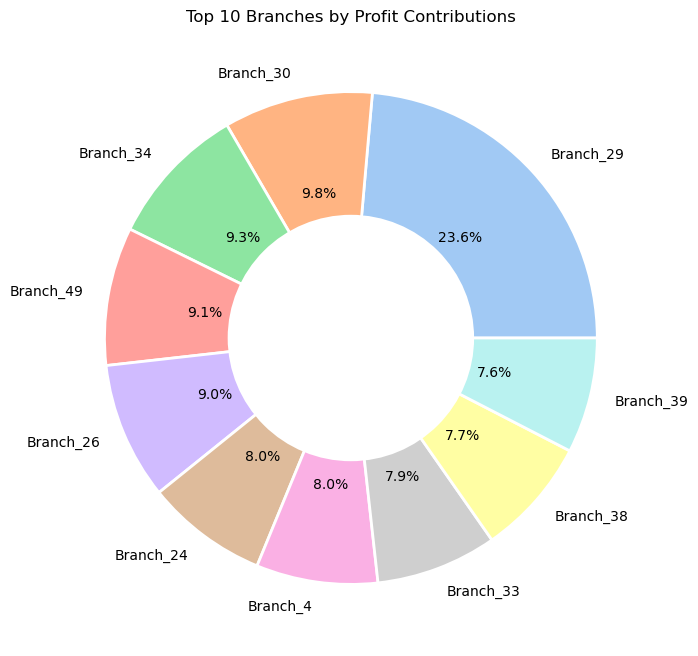

In [23]:
top_branches = df.groupby("Branch_Name")["Net_Profit"].sum().sort_values(ascending=False).head(10)  # Top 10 branches
plt.figure(figsize=(8, 8))
plt.pie(top_branches, labels=top_branches.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"), wedgeprops={'edgecolor': 'white', 'linewidth': 2})

# Adding a white circle at the center to make the pie chart a donut chart
centre_circle = plt.Circle((0,0),0.50,fc='white')
plt.gca().add_artist(centre_circle)

plt.title("Top 10 Branches by Profit Contributions")
plt.show()

<h2 style="color:purple;"> Exploratory Data Analysis (EDA)</h2>

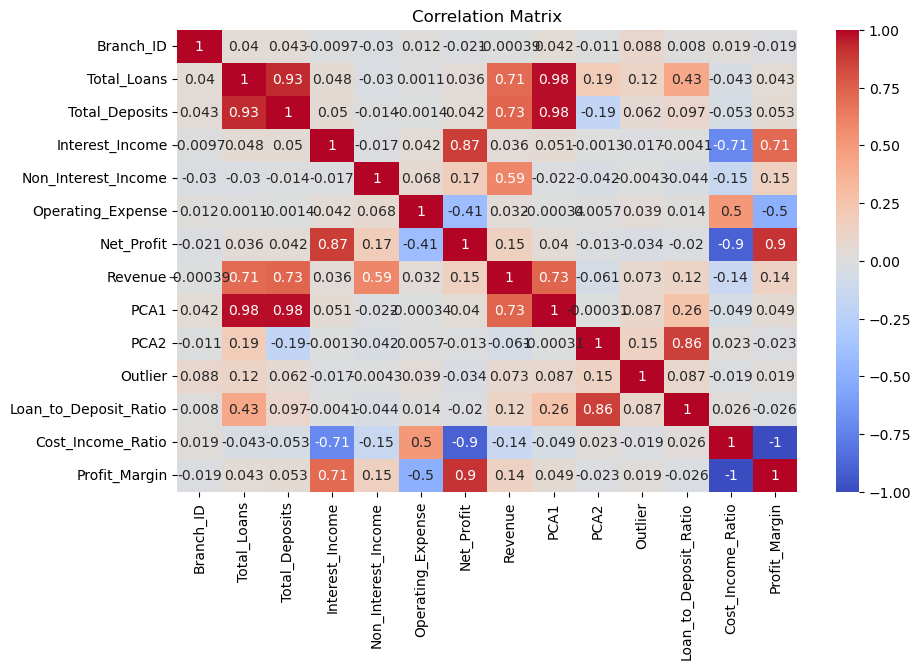

In [24]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
#Key Insight: If Net Profit is highly correlated with Total Deposits, it means branches with higher deposits are more profitable.

<h2 style="color:purple;">Branch Profitability Ranking</h2>

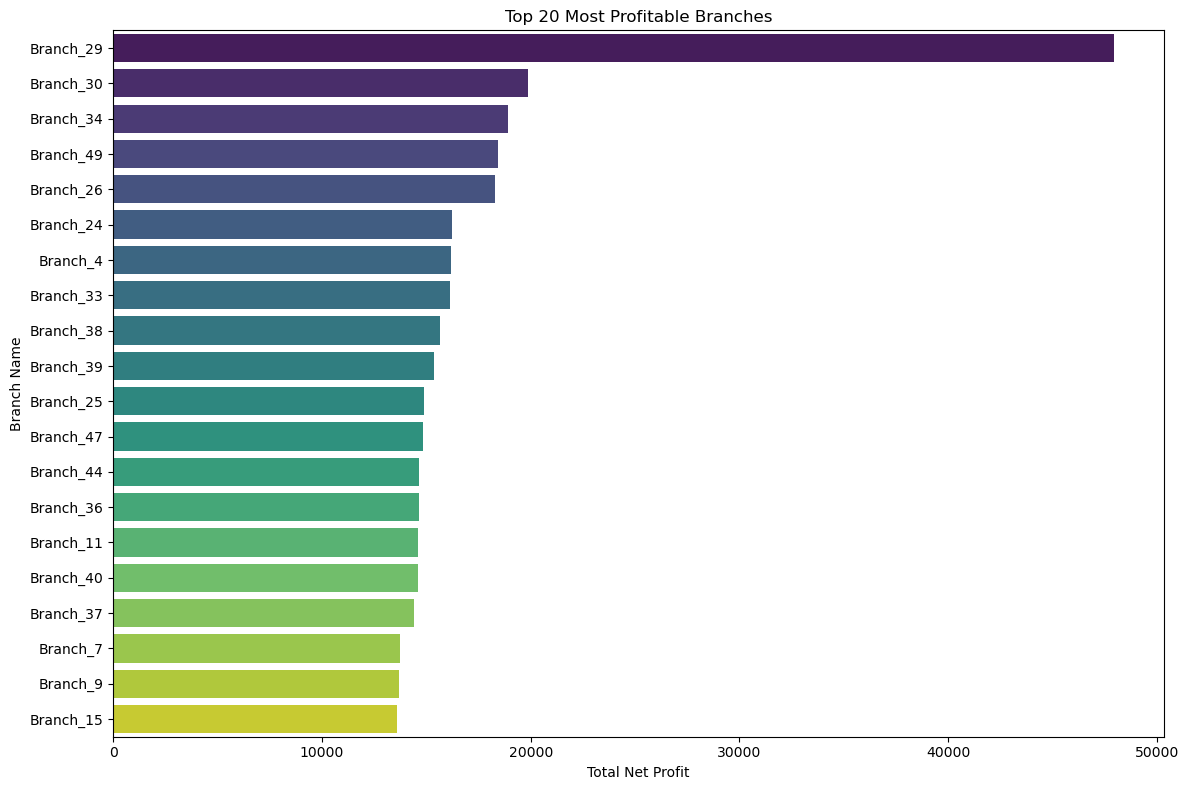

             Total_Net_Profit  Profitability_Rank
Branch_Name                                      
Branch_29        47942.307848                 1.0
Branch_30        19885.289424                 2.0
Branch_34        18929.124979                 3.0
Branch_49        18423.093408                 4.0
Branch_26        18287.353960                 5.0
Branch_24        16231.488697                 6.0
Branch_4         16201.908358                 7.0
Branch_33        16139.430266                 8.0
Branch_38        15678.217082                 9.0
Branch_39        15386.091740                10.0
Branch_25        14911.085964                11.0
Branch_47        14822.648276                12.0
Branch_44        14661.347904                13.0
Branch_36        14656.947843                14.0
Branch_11        14614.156855                15.0
Branch_40        14583.578541                16.0
Branch_37        14410.374941                17.0
Branch_7         13761.868635                18.0


In [25]:
df["Net_Profit"] = pd.to_numeric(df["Net_Profit"], errors="coerce")
df = df.dropna(subset=["Branch_Name", "Net_Profit"])

# Group by Branch_Name and calculate total net profit
branch_profitability = df.groupby("Branch_Name")["Net_Profit"].sum().sort_values(ascending=False)

# Create a ranking
branch_profitability_rank = branch_profitability.rank(ascending=False, method="min")

# Combine profitability and rank into a DataFrame
profit_rank_df = pd.DataFrame({
    "Total_Net_Profit": branch_profitability,
    "Profitability_Rank": branch_profitability_rank
}).sort_values("Profitability_Rank")
# Plot the bar chart for the top 20 most profitable branches
plt.figure(figsize=(12, 8))
sns.barplot(x="Total_Net_Profit", y=profit_rank_df.index[:20], data=profit_rank_df.head(20), palette="viridis")
plt.title("Top 20 Most Profitable Branches")
plt.xlabel("Total Net Profit")
plt.ylabel("Branch Name")
plt.tight_layout()
plt.show()

# Display the full ranking
print(profit_rank_df)

<h2 style="color:purple;">K-Means Clustering for Benchmarking</h2>

In [26]:
df.columns

Index(['Branch_ID', 'Branch_Name', 'Total_Loans', 'Total_Deposits',
       'Interest_Income', 'Non_Interest_Income', 'Operating_Expense',
       'Net_Profit', 'Revenue', 'Location', 'PCA1', 'PCA2', 'Outlier',
       'Loan_to_Deposit_Ratio', 'Cost_Income_Ratio', 'Profit_Margin'],
      dtype='object')

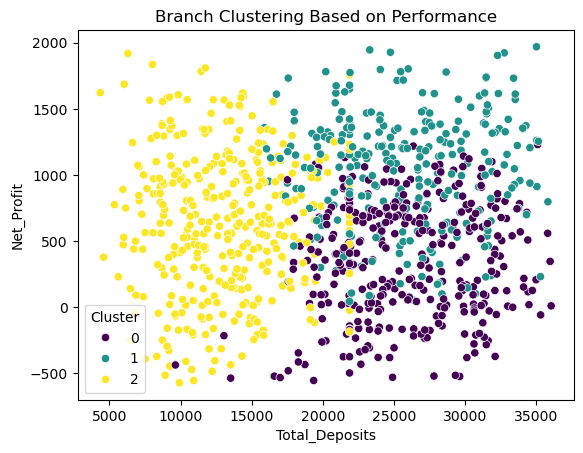

In [27]:
# Scale the data for better clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Net_Profit', 'Total_Loans', 'Total_Deposits', 'Operating_Expense']])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualizing Clusters
sns.scatterplot(x=df['Total_Deposits'], y=df['Net_Profit'], hue=df['Cluster'], palette='viridis')
plt.title('Branch Clustering Based on Performance')
plt.show()

<h5 style="color:purple;"> From above clustering we get to know</h5><br>
<p> 1)<b>High-profit branches </b>are in one cluster[0].<br>
 2)<b>Medium-performing branches</b> in another[1].<br>
3)<b>Low-performing branches</b> need improvement[2]<br></p>

In [28]:
# Display the Net_Profit column
print(df['Net_Profit'])


0        501.869895
1       1184.438764
2        171.955005
3        650.672079
4        507.948037
           ...     
1012    1309.065907
1013      83.975981
1015     617.271050
1016     840.460390
1019    1193.048799
Name: Net_Profit, Length: 1011, dtype: float64


<h2 style="color:purple;">Splitting the Cleaned Dataset into Train and Test Data with Model Training</h2>

In [29]:
# Assuming df is your DataFrame with features and target
# Replace this with your actual dataset
# Example: df = pd.read_csv("your_dataset.csv")
X = df[['Total_Loans', 'Total_Deposits', 'Interest_Income', 'Operating_Expense']]  # Features
y = df['Net_Profit']  # Target (Net Profit)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define regression models to evaluate
models = {
   
    "LinearRegression": LinearRegression(),
    "MLPRegressor": MLPRegressor(max_iter=500),
    "RandomForestRegressor": RandomForestRegressor(random_state=42),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=42)
}

# Initialize results list
results = [] # An empty list that will hold the evaluation results for each model.

# Evaluate each model
for model_name, model in models.items():
    try:
        start_time = time.time() #Records the start time to measure execution time.
        
        # Train the model
        model.fit(X_train, y_train) #trains the model using the training data.
        
        # Make predictions
        y_pred = model.predict(X_test) #Makes predictions using the trained model and the test data.


        
        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)#penalize large errors
        rmse = np.sqrt(mse)#bring error back to original unit of measurement .used for interepretability 
        mae = mean_absolute_error(y_test, y_pred)#absolute difference between predicted and actual value
        r2 = r2_score(y_test, y_pred)#for accuracy
        smape = 100 * np.mean(np.abs(y_test - y_pred) / ((np.abs(y_test) + np.abs(y_pred)) / 2))#define percent.difference between predicted and actual value 
        execution_time = time.time() - start_time
        
        # Append results for the current model
        results.append({
            "Model": model_name,
             "Mse" : mse,
            "RMSE": rmse,
            "MAE": mae,
            "R² Score": r2,
            "SMAPE": smape,
            "Execution Time (s)": execution_time
        })
    
    except Exception as e:
        # Handle errors during training/evaluation
        results.append({
            "Model": model_name,
             "mse":np.nan,
            "RMSE": np.nan,
            "MAE": np.nan,
            "R² Score": np.nan,
            "SMAPE": np.nan,
            "Execution Time (s)": np.nan,
            "Error": str(e)
        })

# Convert results to a DataFrame for display
results_df = pd.DataFrame(results)

# Display the results table
print(results_df)



                   Model           Mse        RMSE         MAE  R² Score  \
0       LinearRegression  16147.289761  127.071987  109.488746  0.940115   
1           MLPRegressor  18753.783080  136.944453  116.903325  0.930449   
2  RandomForestRegressor  19572.452240  139.901581  117.473126  0.927413   
3  DecisionTreeRegressor  36860.059459  191.989738  155.913285  0.863299   

       SMAPE  Execution Time (s)  
0  33.005446            0.022274  
1  31.963639            0.138405  
2  34.113734            0.360931  
3  40.612879            0.000000  


<h2 style="color:purple;">Graph Visualization of  Predicted Vs Actual value </h2>

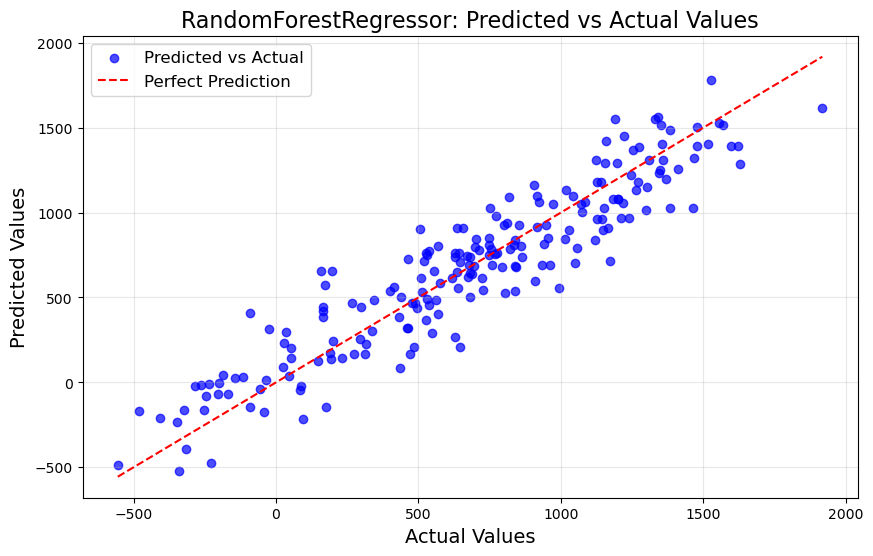

In [30]:

# Assuming y_test (actual values) and y_pred (predicted values) are available
# Replace 'model_name' with the name of the specific model you're plotting for clarity
model_name = "RandomForestRegressor"

# Create a scatter plot to compare predicted and actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual') #Alpha Sets the transparency of the points for better visibility.
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

# Add labels, title, and legend
plt.title(f'{model_name}: Predicted vs Actual Values', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Show the plot
plt.show()


<h2 style="color:purple;">Predict branch profitability using Random Forest Regression and Hyper-Parameter Tuning using Grid Search.</h2>

In [32]:
# Assuming df is your DataFrame with features and target
X = df[['Total_Loans', 'Total_Deposits', 'Interest_Income', 'Operating_Expense']]  # Features
y = df['Net_Profit']  # Target (Net Profit)
# Assuming X (features) and y (target) are prepared from your dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest Regression model
rf = RandomForestRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],  # Number of trees in random forest 
    'max_depth': [None, 10],  # Depth of trees in random forest 
    'min_samples_split': [2, 5],  # Min no.of sample required to split internal node
    'min_samples_leaf': [1, 2, 4]  # Min no.of sample required to be at leaf-node.
}

# Perform Grid Search:
#cv=5: Performs 5-fold cross-validation, splitting the training data- 5 subsets,training the model on 4 subsets,and testing it on the 1 subset.
#The scoring metric used to evaluate the model’s performance during grid search.
# Using negative MSE allows it to pick the combination with the lowest error as GridSearchCV minimizes the scoring function. 
# n-jobs : Uses all available CPU cores to perform the computation in parallel.
#n_jobs=-1  means use all available core of CPU 
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the best Random Forest Regression model
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Make predictions
y_pred = best_rf.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
smape = 100 * np.mean(np.abs(y_test - y_pred) / ((np.abs(y_test) + np.abs(y_pred)) / 2))#symmetric mean absolute percentage error

# Print results
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"SMAPE: {smape:.2f}%")


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
MSE: 17956.4535
RMSE: 134.0017
MAE: 114.0375
SMAPE: 34.47%


<h2 style="color:purple;">Get the High-Performing and Low-Performing Branches</h2>

In [33]:
# Identify high-performing and low-performing branches
high_performing_branches = df[df['Cluster'] == df['Cluster'].max()]
low_performing_branches = df[df['Cluster'] == df['Cluster'].min()]

# Display key financial metrics for comparison
high_vs_low = pd.concat([
    high_performing_branches[['Branch_ID', 'Net_Profit', 'Cost_Income_Ratio', 'Loan_to_Deposit_Ratio']].mean().rename('High-Performing'),
    low_performing_branches[['Branch_ID', 'Net_Profit', 'Cost_Income_Ratio', 'Loan_to_Deposit_Ratio']].mean().rename('Low-Performing')
], axis=1)

# Show the comparison
display(high_vs_low)

,High-Performing,Low-Performing
Branch_ID,14.891496,15.213500
Net_Profit,639.315181,354.474447
Cost_Income_Ratio,0.645544,0.839565
Loan_to_Deposit_Ratio,0.441164,0.488850


In [34]:
df.groupby('Cluster')[['Operating_Expense', 'Non_Interest_Income', 'Interest_Income']].mean()


,Operating_Expense,Non_Interest_Income,Interest_Income
Cluster,,,
0,1001.807951,279.067783,1077.214615
1,587.915182,284.825486,1350.978983
2,807.122677,285.929425,1160.508433


<h2 style="color:purple;"> Struggle behind low-performing branches are :</h2>
<p>1) Operating expenses are too high in low-performing branches.<br>
 2)If non-interest income (fees, commissions) is lower in struggling branches.<br>
3)If interest income (loan revenue) is lower, meaning they aren’t lending enough.<br></p>


<h2 style="color:purple;">Conclusion </h2>

<p>This analysis provides a data-driven approach for decision-making, enabling companies to focus on branches that require attention while maximizing overall profitability. <br></p>
<p><b>Branch Profitability Ranking:</b><br>
1)Ranking of  branches based on their Net Profit, identifying high-performing and low-performing branches.<br>
2)A Donut  chart visualization highlighted the top 10  most profitable branches.<br>
3)A pie chart indicating the top 5 revenue branches <br>
4)4)Predicting branch profitability using Random forest regression and Hypter-Tuning GridsearchCV</p>
<p><b>Clustering Analysis:</b><br>
1)We segmented branches into three clusters (High, Medium, and Low Performance) based on profitability, deposits, loans, and operating expenses<br>
2)The clustering results provided a clear differentiation among branches, helping to identify underperforming locations.</p>
<p><b>Model evaluating Alogrithms </b><br>
1)Random Forest Regression :We used the Random Forest algorithm to determine which factors contribute most to profitability.<br>
2)Linear Regression : Supervised learning algorithm used to predict continous values<br>
3)MPL Classifer(Multi-Layer Perception): Neural network type algorithm that is used to learn each pattern from data and make prediction<br> 
4) Decision Tree classifier : Used for classification and regression</p>
<p><b>Benchmarking and Performance Comparison:</b><br>
1)We compared high-performing branches against low-performing ones to understand factors contributing to success or failure.<br>
2)Metrics such as Loan-to-Deposit Ratio, Cost-Income Ratio, and Profit Margin were used to benchmark branches.<br>
3)Construct Graph of Predicted  vs actual values <br></p>
<p><b>Geographical locations</b><br>
1)we represented the geographical location of top 50 branches with help of folium library</p>